# Contents

- [Plots.jl](#Plots)
 - [Basic](#Basic)
 - [Multiple lines](#Multiple-lines)
 - [Parametric function](#Parametric-function)
 - [Polar plots](#Polar-plots)
 - [Log scale](#Log-scale)
 - [Scatter plot](#Scatter-plot)
 - [Stem plot](#Stem-plot)
 - [Quiver](#Quiver)
 - [Pie plot](#Pie-plot)
 - [Histogram](#Histogram)
 - [Bar plot](#Bar-plot)
 - [Subplot](#Subplot)
 - [Heatmap](#Heatmap)
 - [Contour](#Contour)
 - [3D plot](#3D-plot)

- [StatPlots.jl](#StatPlots)
 - [Boxplot](#Boxplot)
 - [Grouped Bar plots](#Grouped-Bar-plots)

# Environment

In [1]:
@show Pkg.installed("Plots"); println()

versioninfo()

Pkg.installed("Plots") = v"0.15.0"

Julia Version 0.6.2
Commit d386e40 (2017-12-13 18:08 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i5-3470 CPU @ 3.20GHz
  WORD_SIZE: 64
  BLAS: libopenblas (SANDYBRIDGE)
  LAPACK: libopenblas
  LIBM: libm
  LLVM: libLLVM-3.9.1 (ORCJIT, ivybridge)


# Plots

ExamplePlots.jl<br>
https://github.com/JuliaPlots/ExamplePlots.jl

In [2]:
# If you use Julia in local, uncomment following code.
# Pkg.add("Plots")
# Pkg.add("PyPlot")
# Pkg.add("Plotly")
# Pkg.add("PlotlyJS")
# Pkg.add("GR")
using Plots

Choose backend

In [3]:
pyplot()
# font = Plots.font("Helvetica", 18)
# pyplot(guidefont=font, size=(600,450), leg=false, grid=false)
# plotly()
# plotlyjs()
# gr()

Plots.PyPlotBackend()

# Basic

```julia
    plot(x_values, y_values, arg...)
    
    or
    
    plot(func, xrange)
```


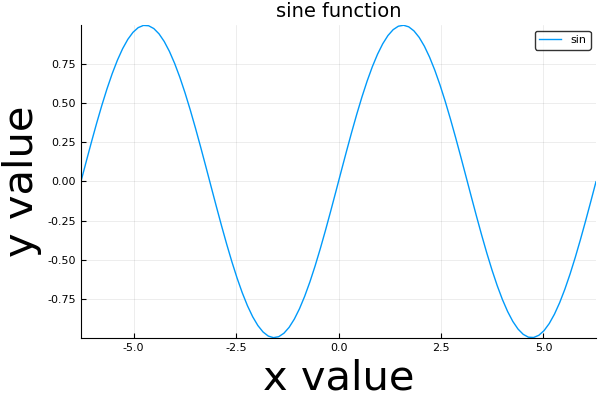

In [4]:
x = linspace(-2π, 2π, 100)
y = sin.(x)
plot(x,y, label="sin", leg=true, grid=true) # leg stands for legend
xlabel!("x value", guidefont=font(30))
ylabel!("y value")
title!("sine function")

# The above code is equivalent to
# plot(x, y, label="sin", leg=true, grid=true, xlabel="x value", ylabel="y value", title="sine function")
# The order of keyword arguments is arbitrary.


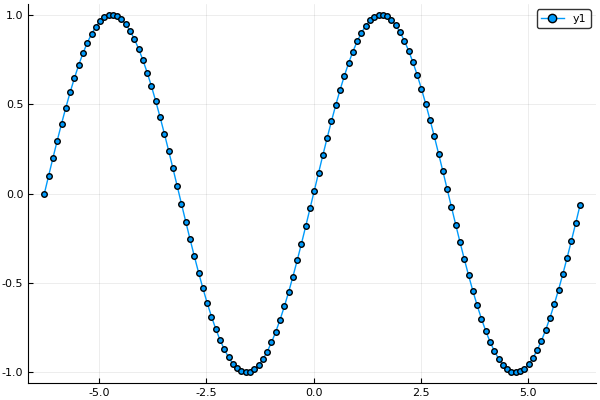

In [5]:
plot(sin, -2pi:0.1:2pi, marker=:circle)


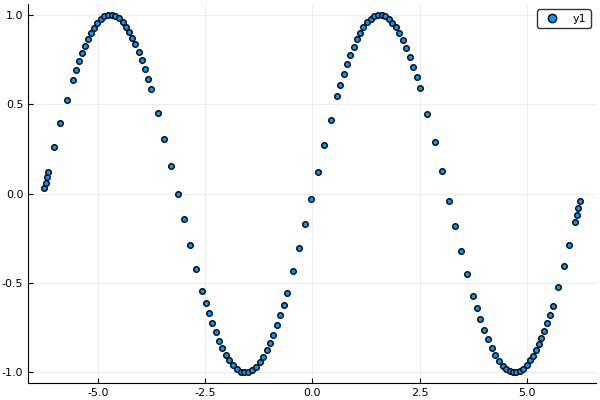

In [6]:
plot(sin, -2pi, 2pi, line=false, marker=:circle)


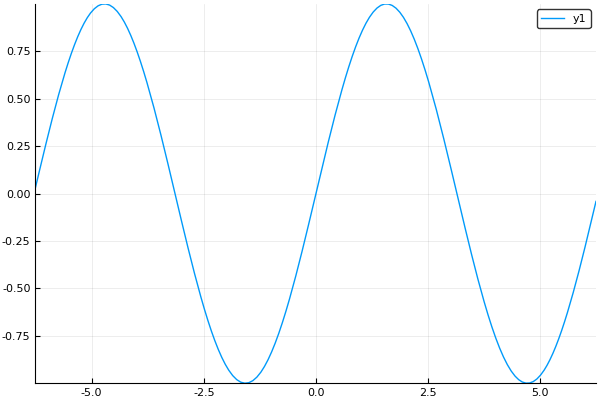

In [7]:
plot(sin, -2pi, 2pi)

You can use your function as well as build-in function


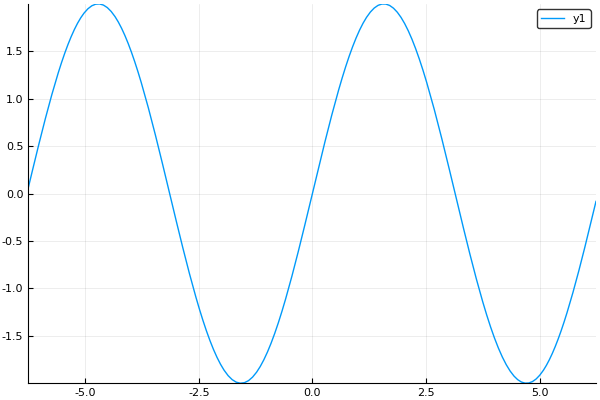

In [8]:
f(x) = 2 * sin(x)
plot(f, -2π, 2π, grid=true)


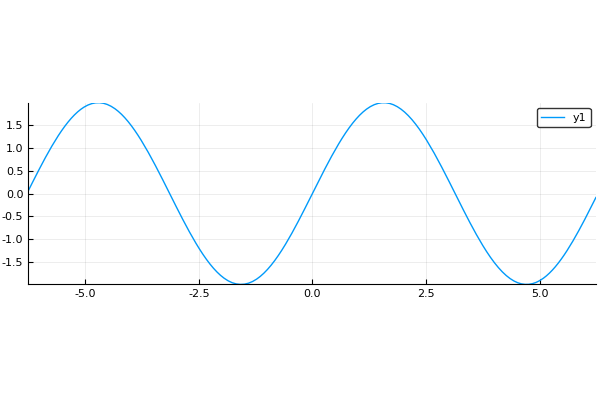

In [9]:
f(x) = 2 * sin(x)
plot(f, -2π, 2π, aspect_ratio=:equal)

# Multiple lines


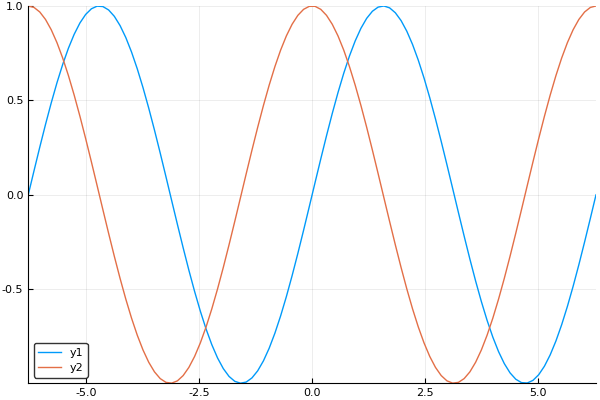

In [10]:
x = linspace(-2pi, 2pi, 100)
y1 = sin.(x)
y2 = cos.(x)
plot(x, [y1 y2])


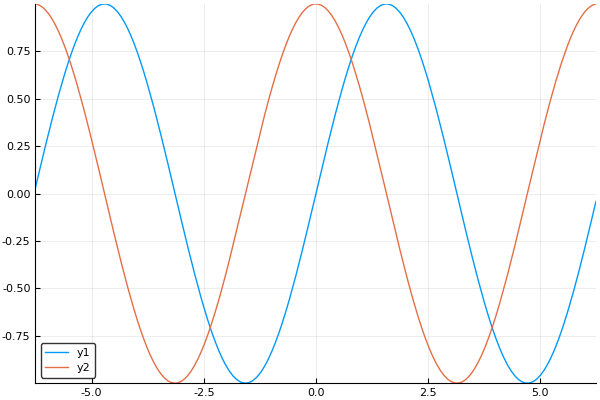

In [11]:
plot([sin, cos], -2pi, 2pi)

# Parametric function


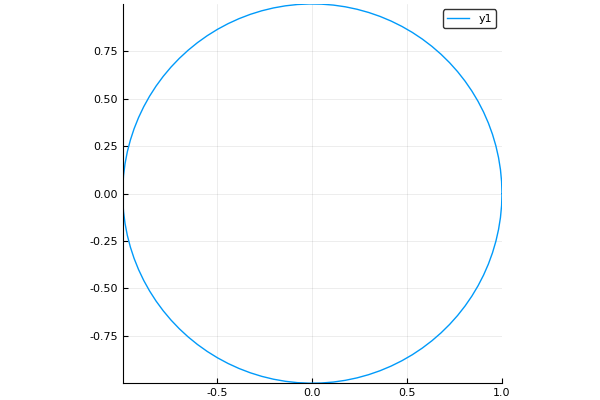

In [12]:
t = linspace(0, 2pi, 100)
x = cos.(t)
y = sin.(t)
plot(x,y, aspect_ratio=1)


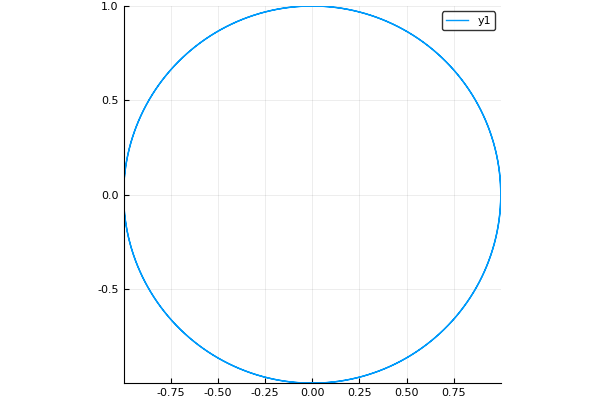

In [13]:
plot(sin, cos, -2pi, 2pi)
plot!(aspect_ratio=1)

# Polar plots


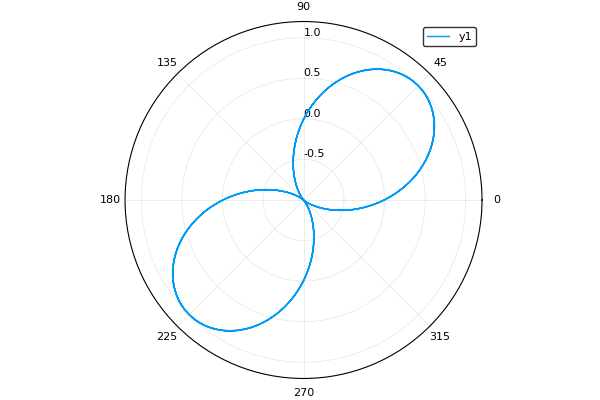

In [14]:
θ = linspace(0,6π,200)
r = (sin.(θ) .* cos.(θ)) * 2
plot(θ, r, proj=:polar)

# Log scale


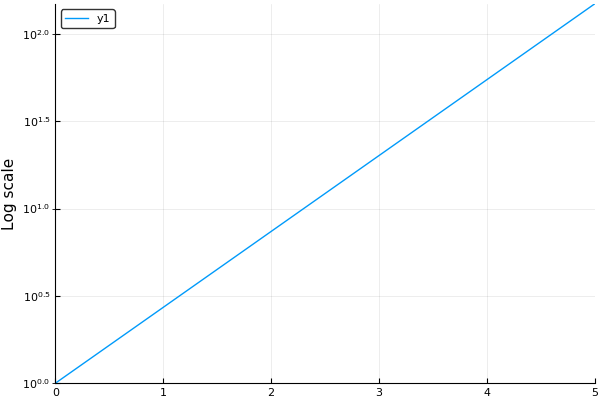

In [15]:
x = linspace(0, 5)
y = exp.(x)
plot(x, y, yscale=:log10, grid=true)
ylabel!("Log scale")


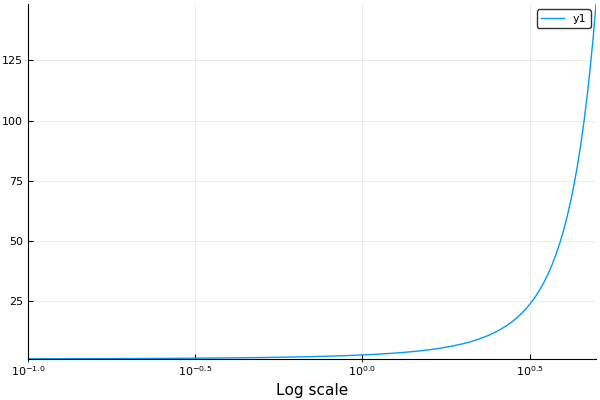

In [16]:
x = linspace(0.1, 5)
y = exp.(x)
plot(x, y, xscale=:log10, grid=true)
xlabel!("Log scale")


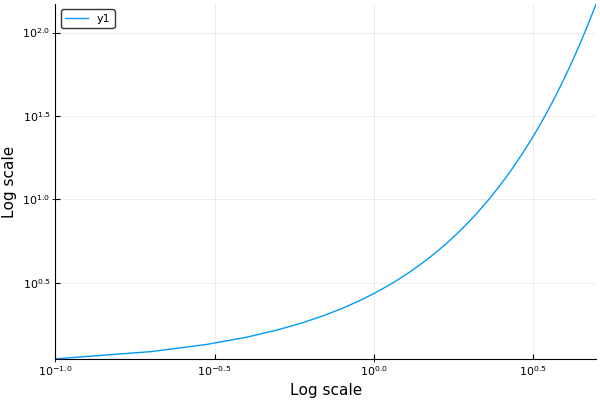

In [17]:
x = linspace(0.1, 5)
y = exp.(x)
plot(x, y, xscale=:log10, yscale=:log10, grid=true)
xlabel!("Log scale")
ylabel!("Log scale")

# Scatter plot


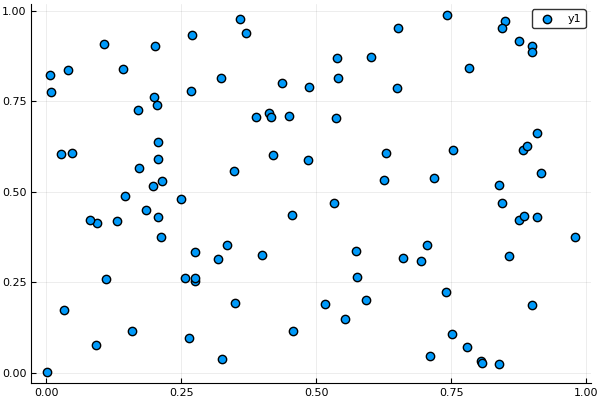

In [18]:
x, y = rand(100), rand(100)
scatter(x, y, markersize=6)


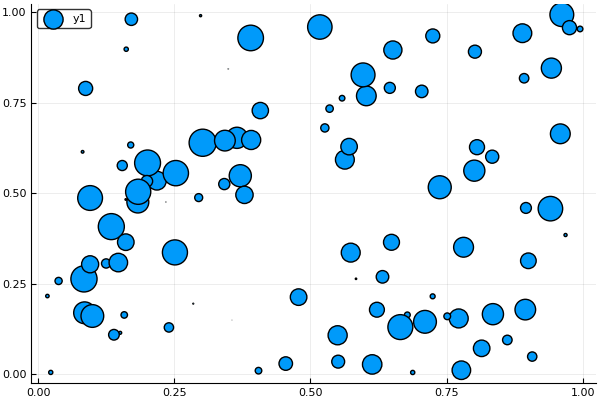

In [19]:
x, y = rand(100), rand(100)
scatter(x, y, markersize=(rand(100) .* 20))

# Stem plot


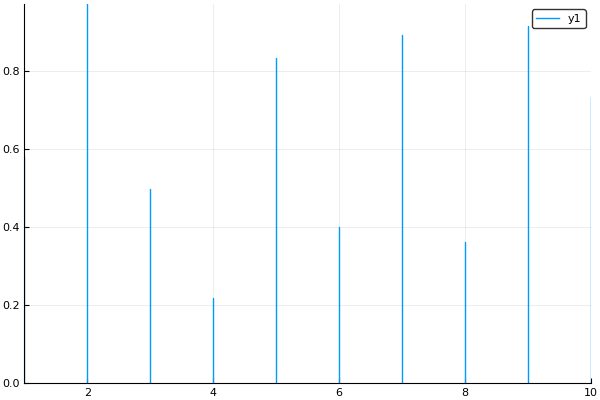

In [20]:
x = rand(10)
plot(x, line=:stem)


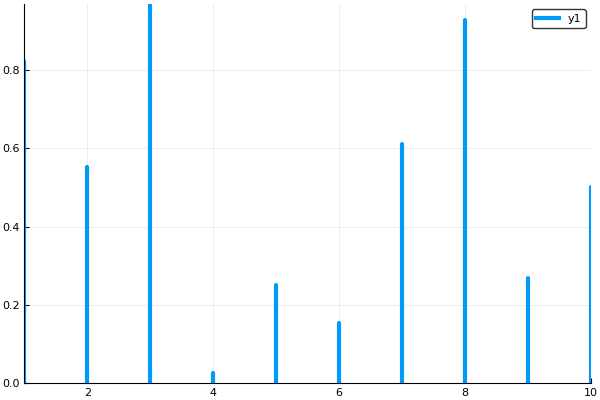

In [21]:
x = rand(10)
plot(x, line=(:stem, 3))


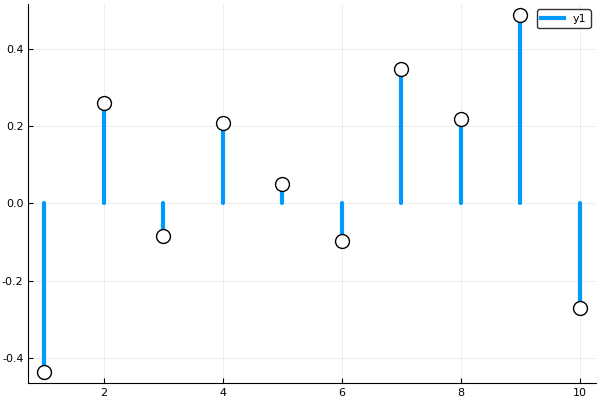

In [22]:
x = rand(10) -.5
plot(x, line=(:stem, 3), marker=(:circle, 10, :white))
# [:none, :auto, :circle, :rect, :diamond, :utriangle, :dtriangle, :cross, :xcross, :star5]

# Quiver


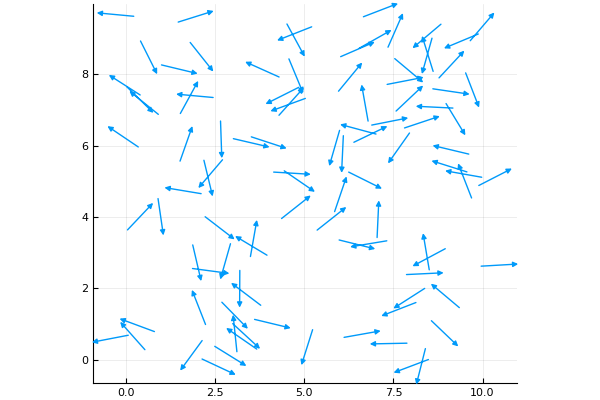

In [23]:
x, y, θ = 10rand(100), 10rand(100), 2π * rand(100)
quiver(x, y, quiver=(cos.(θ), sin.(θ)), aspect_ratio=1)

# Pie plot


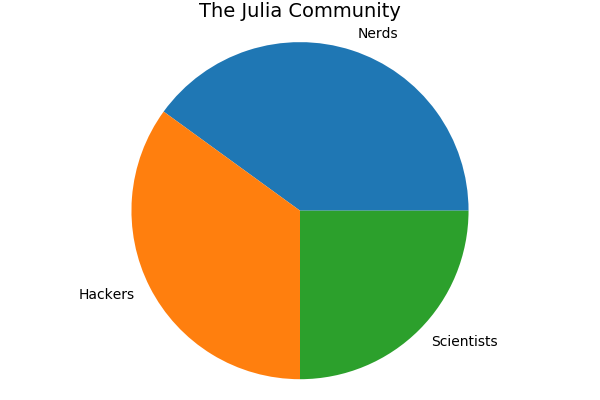

In [24]:
# From Plots.jl example, https://juliaplots.github.io/examples/pyplot/
x = ["Nerds","Hackers","Scientists"]
y = [0.4,0.35,0.25]
pie(x,y,title="The Julia Community",l=0.5)

# Histogram


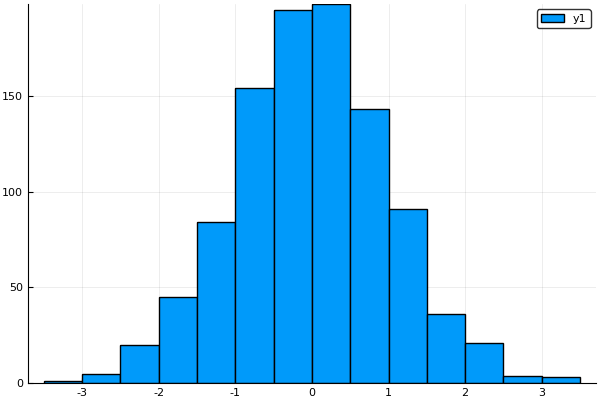

In [25]:
histogram(randn(1000))


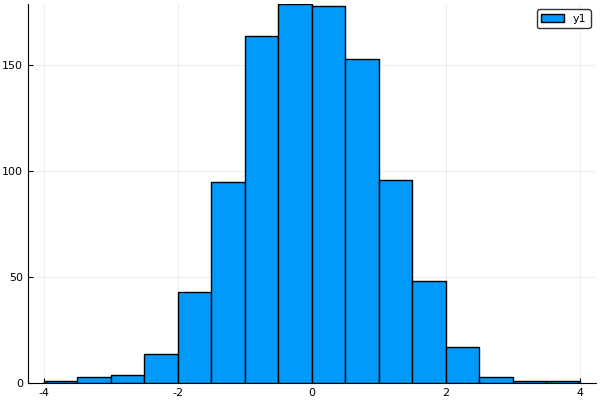

In [26]:
histogram(randn(1000), bins=20)


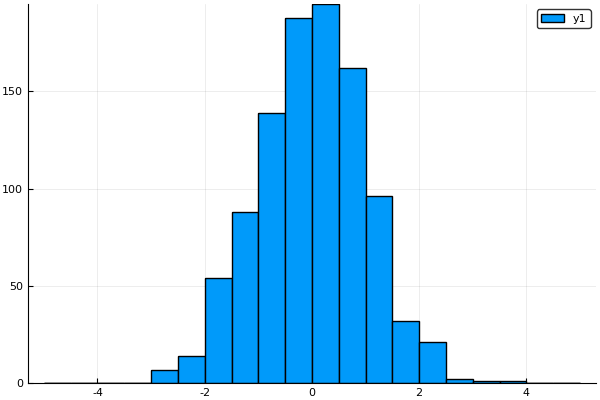

In [27]:
histogram(randn(1000), bins=-5:0.5:5)

# Bar plot


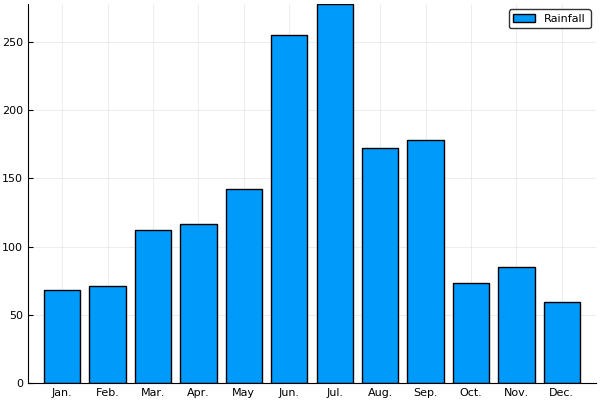

In [28]:
# pyplot()
rain = [68.0,71.5,112.5,116.6,142.5,254.8,277.9,172.0,178.4,73.7,84.8,59.8]
# avgtemp = [9.9,11.1,14.4,19.5,23.7,26.9,30.9,32.1,28.3,23.4,17.8,12.6]
month = ["Jan.","Feb.","Mar.","Apr.","May","Jun.","Jul.","Aug.","Sep.","Oct.","Nov.","Dec."]
bar(rain, xticks=(1:12, month), label="Rainfall")


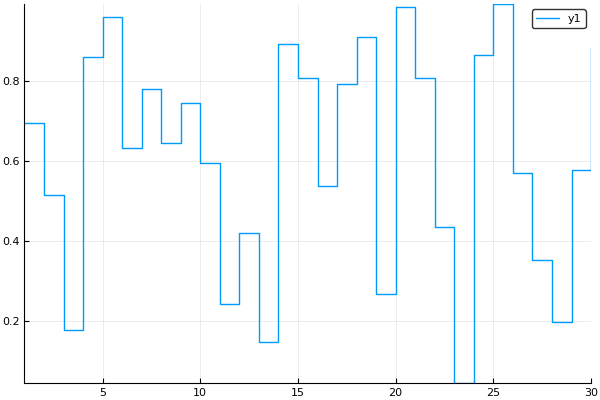

In [29]:
plot(rand(30), linetype=:step)

# Subplot


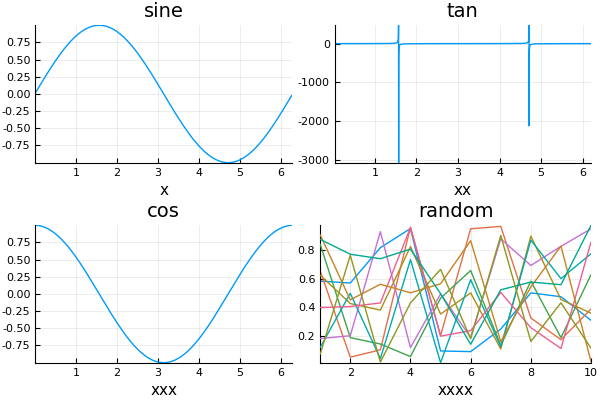

In [30]:
a = plot(sin, 0, 2pi, xlabel="x", title="sine")
b = plot(tan, 0, 2pi, xlabel="xx", title="tan")
c = plot(cos, 0, 2pi, xlabel="xxx", title="cos")
d = plot(rand(10,10), xlabel="xxxx", title="random")
plot(a, b, c, d, layout=4, leg=false)

In [31]:
plot(a, b, c, d, layout=4, leg=false, size=(800, 600), top_margin=3mm)

LoadError: [91mUndefVarError: mm not defined[39m

In [32]:
plot(a, b, c, d, layout=(4,1), leg=false, size=(800, 600), top_margin=3mm)

LoadError: [91mUndefVarError: mm not defined[39m

In [33]:
plot(a, b, c, d, layout=(1,4), leg=false, size=(900, 300), top_margin=3mm)

LoadError: [91mUndefVarError: mm not defined[39m

# Heatmap


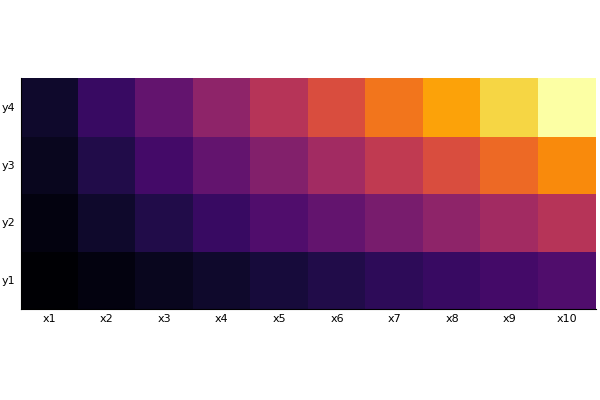

In [34]:
xs = [string("x",i) for i = 1:10]
ys = [string("y",i) for i = 1:4]
z = float((1:4) * (1:10)')
heatmap(xs,ys,z,aspect_ratio=1, colorbar=false)

In [35]:
using Images

In [36]:
la = label_components(rand(Bool, 10, 10))

10×10 Array{Int64,2}:
 1  1  0  0  5  5  0  7  0  9
 1  0  2  0  0  5  5  0  0  0
 0  2  2  0  0  5  0  8  8  0
 2  2  0  0  0  0  3  0  0  3
 2  0  0  0  3  3  3  3  0  3
 0  3  0  3  3  3  0  3  3  3
 3  3  3  3  3  3  3  0  3  0
 3  0  0  3  0  3  0  0  3  3
 0  0  0  3  0  0  3  3  3  3
 0  0  4  0  0  6  0  3  3  3


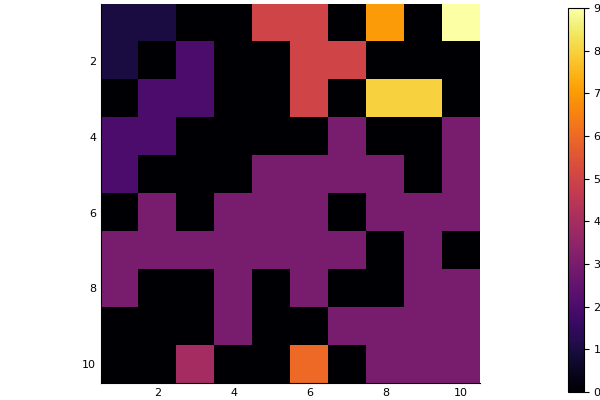

In [37]:
heatmap(la, aspect_ratio=1)
yflip!()

In [38]:
flipdim(la, 1)

10×10 Array{Int64,2}:
 0  0  4  0  0  6  0  3  3  3
 0  0  0  3  0  0  3  3  3  3
 3  0  0  3  0  3  0  0  3  3
 3  3  3  3  3  3  3  0  3  0
 0  3  0  3  3  3  0  3  3  3
 2  0  0  0  3  3  3  3  0  3
 2  2  0  0  0  0  3  0  0  3
 0  2  2  0  0  5  0  8  8  0
 1  0  2  0  0  5  5  0  0  0
 1  1  0  0  5  5  0  7  0  9


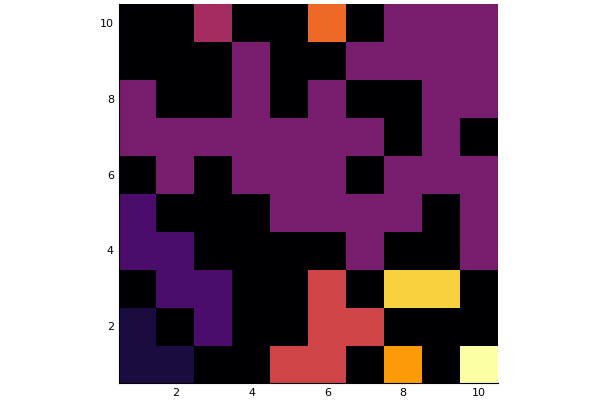

In [39]:
heatmap(la, aspect_ratio=1, colorbar=false)

# Contour

In [40]:
foo(x,y) = x^2 + y^2

foo (generic function with 1 method)


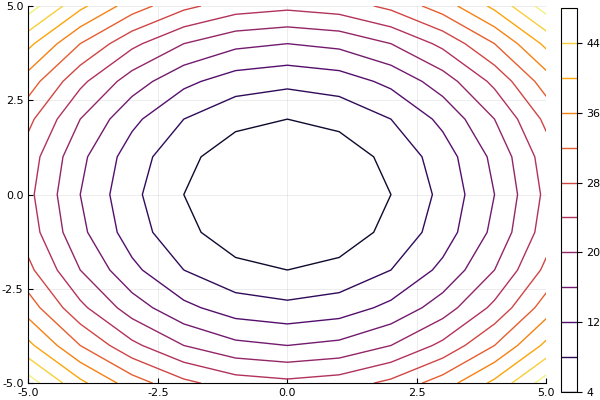

In [41]:
x = -5:5
y = -5:5
contour(x, y, foo)


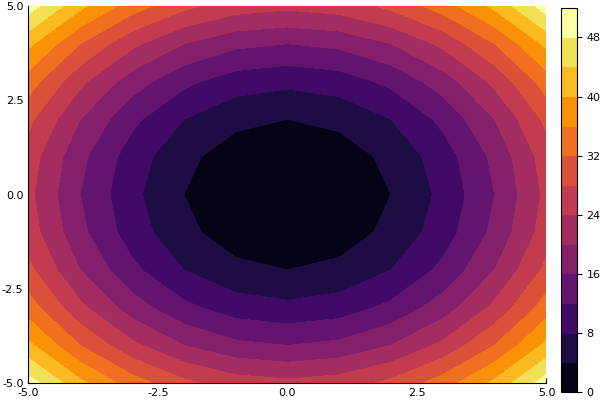

In [42]:
contour(x, y, foo, fill=true)

# 3D plot


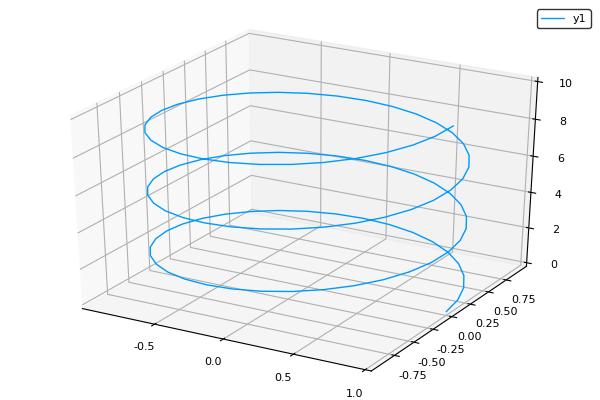

In [43]:
nbins = 100
t = linspace(0, 6pi, nbins)
x = cos.(t)
y = sin.(t)
z = linspace(0, 10, nbins)
plot3d(x, y, z)


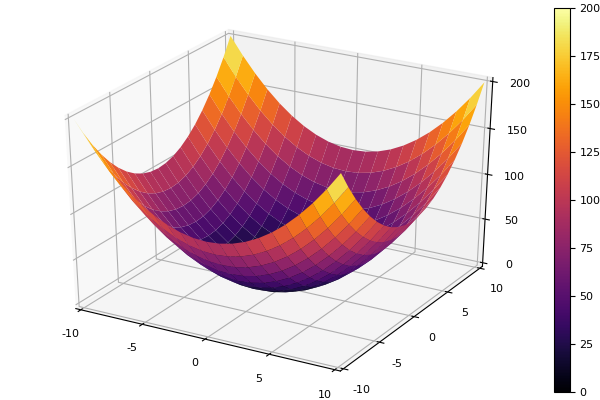

In [44]:
x = -10:10
y = x
surface(x, y, (x,y)-> x^2 + y^2)


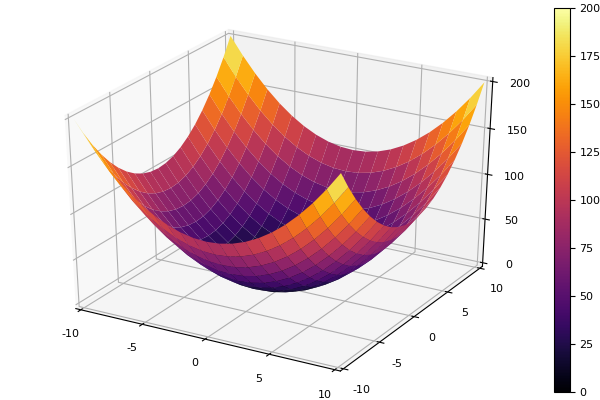

In [45]:
# equivalent
f(x,y) = x^2 + y^2
x = -10:10
y = x
surface(x, y, f)


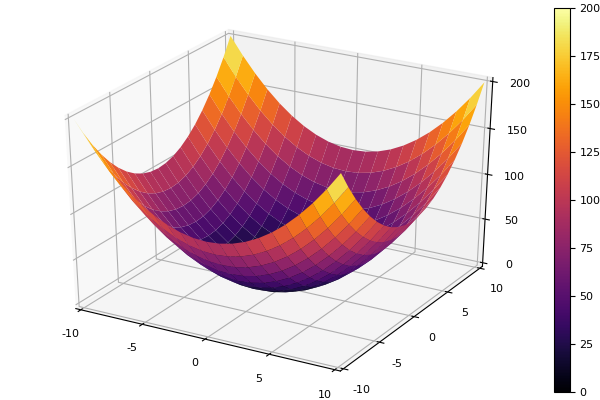

In [46]:
plot(x, y, f, linetype=:surface)


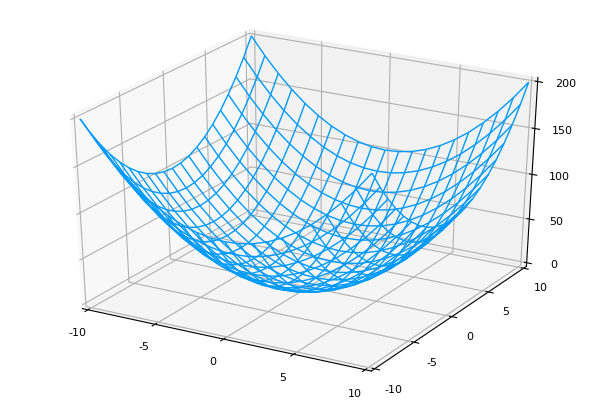

In [47]:
plot(x, y, f, linetype=:wireframe)

# StatPlots

In [48]:
Pkg.add("RDatasets")
using StatPlots, RDatasets

INFO: Package RDatasets is already installed
INFO: METADATA is out-of-date — you may not have the latest version of RDatasets
INFO: Use `Pkg.update()` to get the latest versions of your packages


# Boxplot

To use boxplot, import StatPlots library.

In [49]:
singers = dataset("lattice", "singer")
head(singers)

,Height,VoicePart
1,64,Soprano 1
2,62,Soprano 1
3,66,Soprano 1
4,65,Soprano 1
5,60,Soprano 1
6,61,Soprano 1



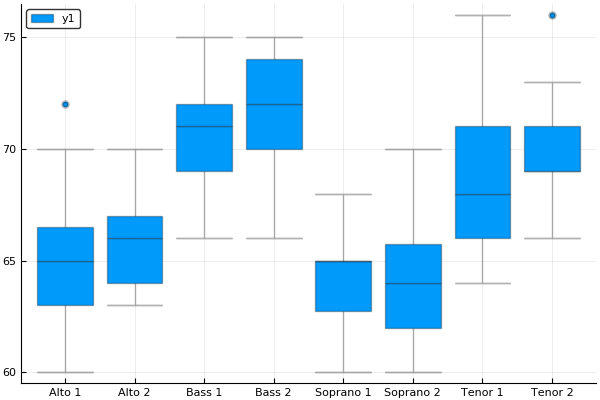

In [50]:
@df singers boxplot(:VoicePart, :Height, marker = (0.3, :orange, stroke(2)))


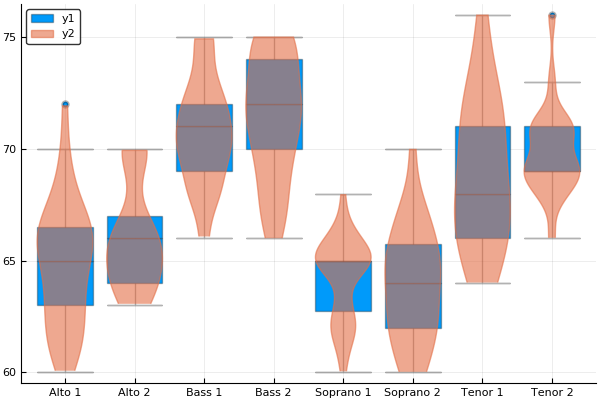

In [51]:
@df singers violin!(:VoicePart, :Height, marker = (0.2, :blue, stroke(0)), alpha=0.6)


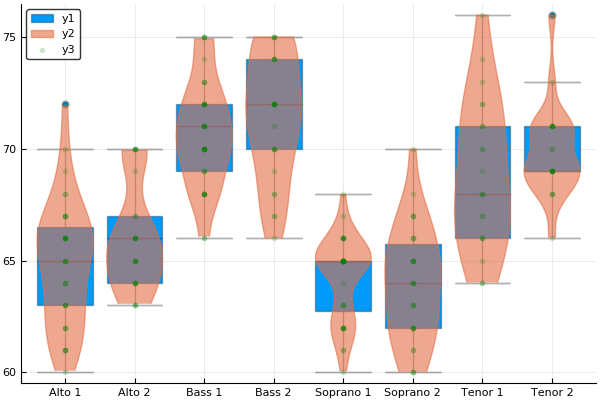

In [52]:
@df singers scatter!(:VoicePart, :Height, marker = (0.2, :green, stroke(0)))


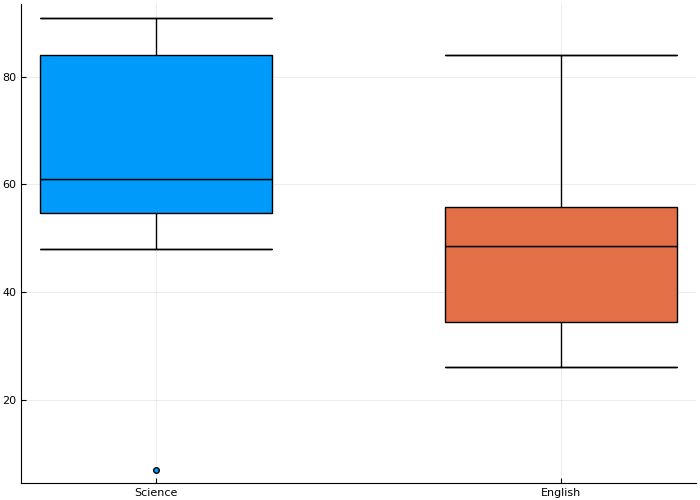

In [53]:
science = [54, 64, 57, 85, 58, 89, 81, 91, 7, 48]
english = [42,29,63,55,54,32,26,84,43,56]
boxplot(["Science" "English"], [science english], leg=false)
plot!(size=(700,500))


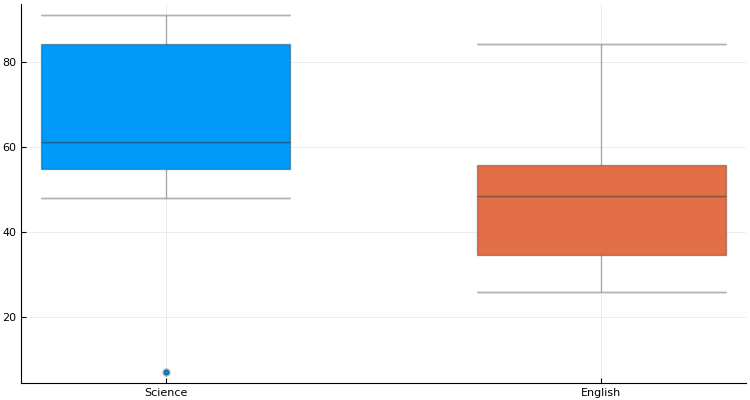

In [54]:
boxplot(["Science" "English"], [science english], leg=false, marker = (0.3, :orange, stroke(2)), size=(750, 400))

# Grouped Bar plots


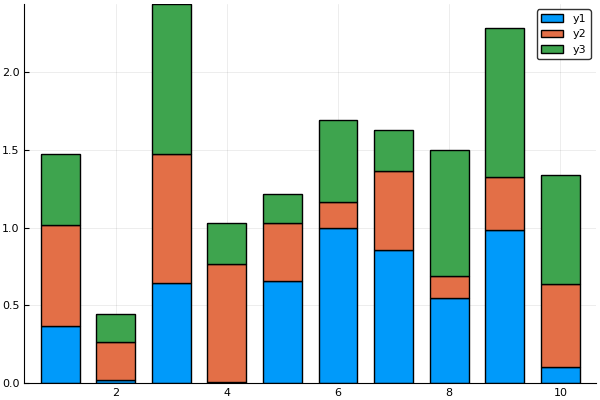

In [55]:
x = rand(10,3)
groupedbar(x, bar_position = :stack, bar_width=0.7)

In [56]:
rotl90(x)

3×10 Array{Float64,2}:
 0.454341  0.18179    0.964378  0.268257    …  0.809973  0.957402  0.702954
 0.650488  0.244377   0.829435  0.755416       0.137694  0.340437  0.531217
 0.365465  0.0189418  0.644087  0.00812488     0.549485  0.98635   0.104631

In [57]:
# boundary at each bar
rotl90(cumsum(x, 2))

3×10 Array{Float64,2}:
 1.47029   0.445109   2.4379    1.0318      …  1.49715   2.28419  1.3388  
 1.01595   0.263319   1.47352   0.763541       0.687178  1.32679  0.635848
 0.365465  0.0189418  0.644087  0.00812488     0.549485  0.98635  0.104631